***
# Python Imaging Library (PIL)
***

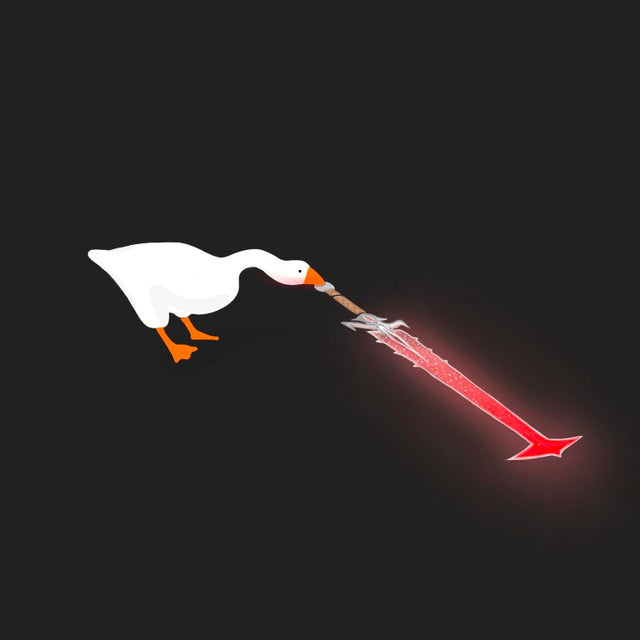

In [24]:
from PIL import Image

pil_image = Image.open('GooseDOOM.jpeg')
pil_image

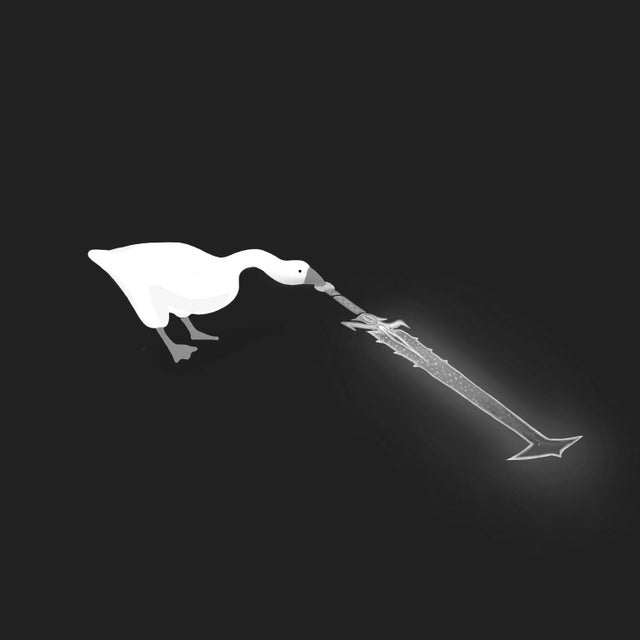

In [25]:
pil_image_converted = Image.open('GooseDOOM.jpeg').convert('L')
pil_image_converted

## Thumbnail creating

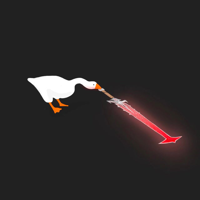

In [30]:
pil_image_thumbnail = Image.open('GooseDOOM.jpeg')
pil_image_thumbnail.thumbnail((200,200))
pil_image_thumbnail

## Copy and paste regions

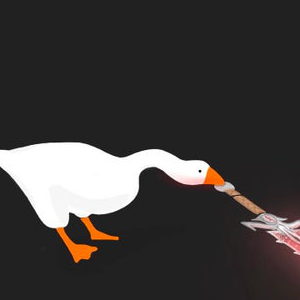

In [38]:
pil_image_region = Image.open('GooseDOOM.jpeg')
box = (100,100,400,400)
region = pil_image_region.crop(box)
region

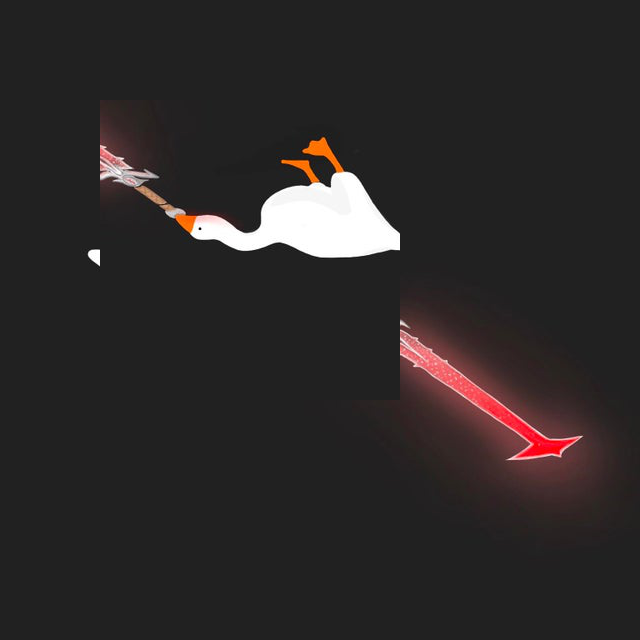

In [41]:
region = region.transpose(Image.ROTATE_180)
pil_image_region.paste(region,box)
pil_image_region

## Resize and rotate

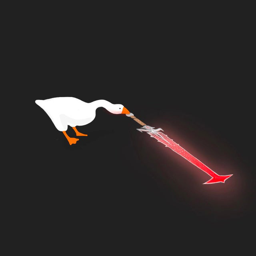

In [47]:
pil_image_resize_and_rotate = Image.open('GooseDOOM.jpeg')
pil_image_resize_and_rotate = pil_image_resize_and_rotate.resize((256,256))
pil_image_resize_and_rotate

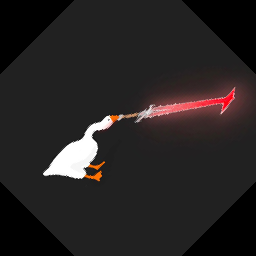

In [48]:
pil_image_resize_and_rotate.rotate(45)

***
# Matplotlib
***

In [49]:
from pylab import *

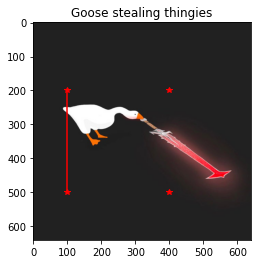

In [62]:
# reading an image
image_plot = array(Image.open('GooseDOOM.jpeg'))

# plotting the image
imshow(image_plot)

# adding points
x = [100,100,400,400]
y = [200,500,200,500]

# plotting the points
plot(x,y, 'r*')

# plotting a line connecting the first two points
plot(x[:2], y[:2], 'r')

# adding a title to the image and show it
title('Goose stealing thingies')
show()

(0.5, 639.5, 0.5, 639.5)

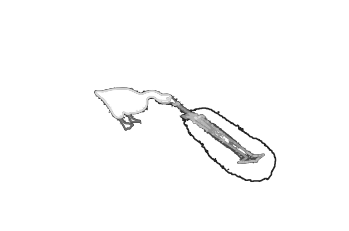

In [74]:
image_plot = array(Image.open('GooseDOOM.jpeg').convert('L'))

# creating a new figure
figure()
# don't use colours
gray()

# show contours
contour(image_plot, origin='image')
axis('equal')
axis('off')

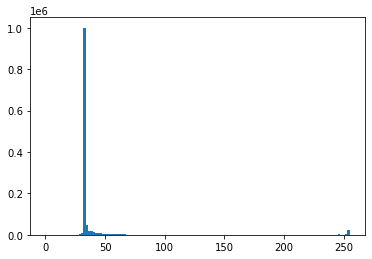

In [78]:
image_hist = array(Image.open('GooseDOOM.jpeg'))
figure()
hist(image_hist.flatten(),128)
show()

## Interactive annotation

Please, click 3 points
You clicked: []


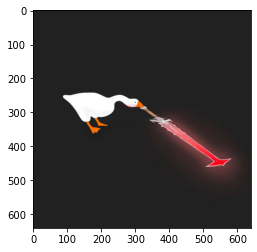

In [85]:
image_plot = array(Image.open('GooseDOOM.jpeg'))
imshow(image_plot)
print('Please, click 3 points')
#x = ginput(3)
print(f'You clicked: {x}')
show()

***
# NumPy
***

In [90]:
from numpy import *

In [91]:
image_numpy = array(Image.open('GooseDOOM.jpeg'))
print(image_numpy.shape, image_numpy.dtype)

image_numpy = array(Image.open('GooseDOOM.jpeg').convert('L'),'f')
print(image_numpy.shape, image_numpy.dtype)

(640, 640, 3) uint8
(640, 640) float32


In [96]:
image_numpy_1 = array(Image.open('GooseDOOM.jpeg').convert('L'))

image_numpy_2 = 255 - image_numpy_1

image_numpy_3 = (100.0/255) * image_numpy_1 + 100

image_numpy_4 = 255.0 * (image_numpy_1/255.0)**2

print (int(image_numpy_1.min()), int(image_numpy_1.max()))
print (int(image_numpy_2.min()), int(image_numpy_2.max()))
print (int(image_numpy_3.min()), int(image_numpy_3.max()))
print (int(image_numpy_4.min()), int(image_numpy_4.max()))

2 255
0 253
100 200
0 255


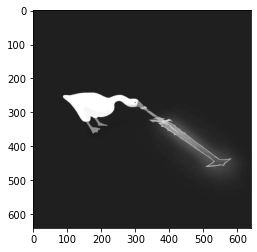

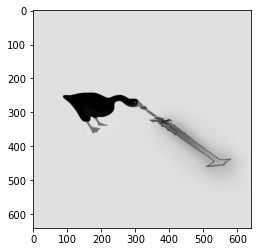

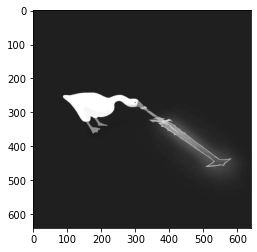

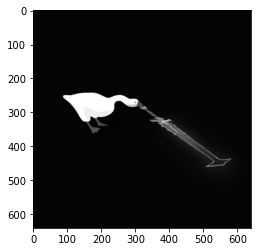

In [109]:
figure()
imshow(image_numpy_1)
figure()
imshow(image_numpy_2)
figure()
imshow(image_numpy_3)
figure()
imshow(image_numpy_4)
show()

## Image resizing

In [111]:
def image_resize(image, size):
    """ Resize an image array using PIL. """
    
    pil_image = Image.fromarray(uint8(image))
    
    return array(pil_image.resize(size))

## Histogram equalization

In [118]:
def histogram_equalization(image, number_of_bins=256):
    """ Histogram equalization of a grayscale image. """
    
    # get image histogram
    image_histogram, bins = histogram(image.flatten(), number_of_bins, normed=True)
    cumulative_dist_func = image_histogram.cumsum()
    cumulative_dist_func = 255*cumulative_dist_func/cumulative_dist_func[-1]
    
    # use linear interpolation of cumulative distribution function to find new pixel values
    image_2 = interp(image.flatten(), bins[:-1], cumulative_dist_func)
    
    return image_2.reshape(image.shape), cumulative_dist_func

<ipython-input-118-e02bf790eed0>:5: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  image_histogram, bins = histogram(image.flatten(), number_of_bins, normed=True)


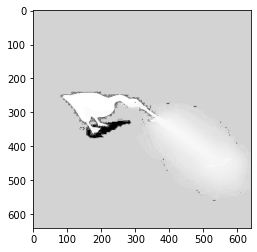

In [122]:
image = array(Image.open('GooseDOOM.jpeg').convert('L'))

image_2, cdf = histogram_equalization(image)

imshow(image_2)

## Averaging images

In [125]:
def compute_average(image_list):
    """ Compute the average of a list of images. """
    
    # open the first image and make into array of type float
    average_image = array(Image.open(image_list[0]), 'f')
    
    for image_name in imagelist[1:]:
        try:
            average_image += array(Image.open(image_name))
        except:
            print (image_name + '... skipped')
        
    average_image /= len(image_list)
    
    # return average as uint8
    return array(average_image, 'uint8')

## PCA of images

In [126]:
def pca(X):
    """ Principal Component Analysis
    input: X, matrix with training data stored as flattened arrays in rows
    return: projection matrix (with important dimensions first), variance and mean.
    """
    
    # get dimensions
    num_data, dim = X.shape
    
    # center data
    mean_X = X.mean(axis=0)
    X = X - mean_X
    
    if dim > num_data:
        # PCA - compact trick used
        M = dot(X,X.T) # covariance matrix
        e, EV = linalg.eigh(M) # eigenvalues and eigenvectors
        tmp = dot(X.T, EV).T # this is the compact trick
        V = tmp[::-1] # reverse since last eigenvectors are the ones we want
        S = sqrt(e)[::-1] # reverse since eigenvalues are in increasing order
        for i in range(V.shape[1]):
            V[:,i] /= S
    else:
        # PCA - SVD used
        U, S, V = linalg.svd(X)
        V = V[:num_data]
        
    
    return V, S, mean_X

## Dataset with different images of cats from README.md

In [205]:
import os

# creating a list with files names
dir_list = os.listdir("dataset\cats\CAT_00")
imlist = []
for item in dir_list:
    if ".jpg" and not ".cat" in item:
        imlist.append(item)
#print(imlist)
imlist.remove("Thumbs.db")
#print(imlist)

['00000001_000.jpg', '00000001_005.jpg', '00000001_008.jpg', '00000001_011.jpg', '00000001_012.jpg', '00000001_016.jpg', '00000001_017.jpg', '00000001_020.jpg', '00000001_024.jpg', '00000001_027.jpg', '00000001_029.jpg', '00000002_001.jpg', '00000002_003.jpg', '00000002_008.jpg', '00000002_026.jpg', '00000003_007.jpg', '00000003_009.jpg', '00000003_012.jpg', '00000003_013.jpg', '00000003_015.jpg', '00000003_020.jpg', '00000003_024.jpg', '00000003_026.jpg', '00000003_029.jpg', '00000004_003.jpg', '00000004_007.jpg', '00000004_008.jpg', '00000004_012.jpg', '00000004_018.jpg', '00000004_023.jpg', '00000004_028.jpg', '00000005_000.jpg', '00000005_001.jpg', '00000005_012.jpg', '00000005_017.jpg', '00000005_020.jpg', '00000005_022.jpg', '00000005_023.jpg', '00000006_006.jpg', '00000006_008.jpg', '00000006_009.jpg', '00000006_011.jpg', '00000006_013.jpg', '00000006_016.jpg', '00000006_022.jpg', '00000006_024.jpg', '00000006_025.jpg', '00000006_029.jpg', '00000007_000.jpg', '00000007_002.jpg',

In [208]:
from pylab import *
import pca

path = "dataset\cats\CAT_00"

im = array(Image.open(os.path.join("dataset\cats\CAT_00", imlist[0]))) # open one image to get size
m,n = im.shape[0:2] # get the size of the images
imnbr = len(imlist)

# create matrix to store all flattened images
# immatrix = array([array(Image.open(os.path.join
#                 ("dataset\cats\CAT_00", im))).flatten()
#                   for im in imlist], 'f')


***
# SciPy
***
